# Example 3

Shows structured meshing in 2D.

In [2]:
import calfem.geometry as cfg
import calfem.mesh as cfm
import calfem.vis_mpl as cfv

## Define geometry

In [3]:
g = cfg.Geometry()

### Define points

In [4]:
g.point([0,0])
g.point([1.2, 0])
g.point([1, 1.3])
g.point([0, 1])
g.point([2, 0.5])

### Add splines

The first four curves are structured curves, i.e the number of nodes along the curves is pre-determined. Parameter elOnCurve states how many elements are placed along the curve. Parameters elDistribType and elDistribVal are optional parameters that specify how elements are distributed.

* "bump" means elements are bunched up at the ends or the middle of the curve. In this case elDistribVal is smaller than 1, so elements crowd at the edges.
* "progression" means each element along the curve is larger/smaller than the previous one. A larger elDistribVal makes the elements larger at the end of the curves. 

In [5]:
g.spline([0,1], el_on_curve=10, el_distrib_type="bump", el_distrib_val=0.2)
g.spline([1,2], el_on_curve=20, el_distrib_type="progression", el_distrib_val=1.1)
g.spline([2,3], el_on_curve=10, el_distrib_type="bump", el_distrib_val=0.2)
g.spline([0,3], el_on_curve=20, el_distrib_type="progression", el_distrib_val=1.1) #Change order of points to reverse progression distribution
g.spline([2, 4, 1])

### Add surfaces

A structured surface must contain 4 curves that have the parameter 'elOnCurve' defined. The number of elements on two opposite curves must be the same (In this case, curves 0 & 2 and 1 & 3).

In [6]:
g.structuredSurface([0,1,2,3]) 
g.surface([4,1])

## Create mesh

In [8]:
mesh = cfm.GmshMesh(g)

mesh.el_type = 3       # quad
mesh.dofs_per_node = 1 
mesh.el_size_factor = 0.01

coords, edof, dofs, bdofs, elementmarkers = mesh.create()

## Visualise mesh

### Draw geometry

In [11]:
%matplotlib inline

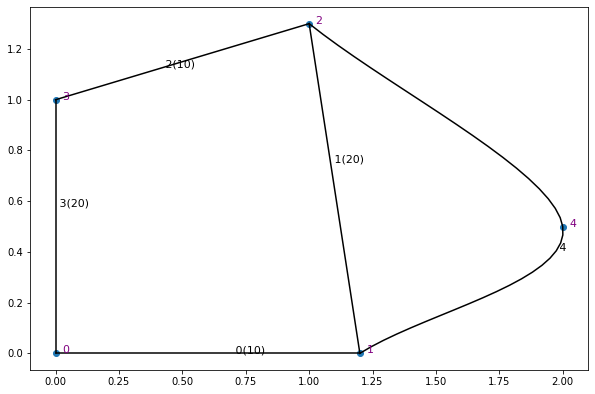

In [13]:
cfv.figure(figsize=(10,10))
cfv.draw_geometry(g)

### Draw mesh

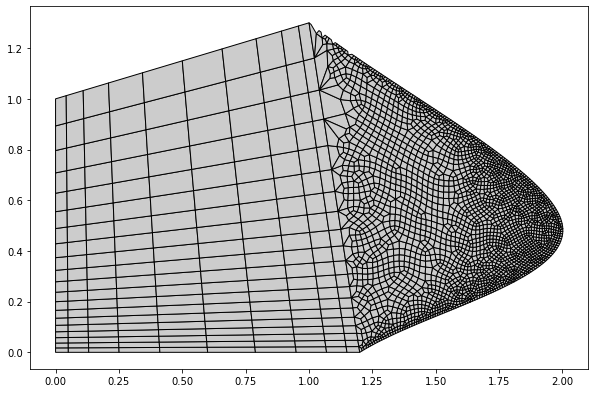

In [14]:
cfv.figure(figsize=(10,10))
cfv.draw_mesh(coords=coords, edof=edof, dofs_per_node=mesh.dofs_per_node, el_type=mesh.el_type, filled=True)